In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Important

In order to use run this data you must download the data sets from the following 3 links and store them in the same folder as your notebook
1. https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
2. https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3
3. https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

In [27]:
#importing datasets
df = pd.read_csv('../Traffic_Crashes_-_Crashes.csv')
df_people = pd.read_csv('../Traffic_Crashes_-_People.csv')
df_vehicles = pd.read_csv('../Traffic_Crashes_-_Vehicles.csv')
df.head()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [28]:
#Merging Datasets on the Crash_Record_ID Column
df_merge = pd.merge(df, df_vehicles, on='CRASH_RECORD_ID').reset_index()
df_merge_2 = pd.merge(df_merge, df_people, on='CRASH_RECORD_ID').reset_index()
#dropping dupllicates(basically only having one instance of the crashID on there)
df_dropped= df_merge_2.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')
#Taking only necessary columns
columns = ['CRASH_RECORD_ID', 'RD_NO_x', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',  'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'RD_NO_y', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID_x', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',  'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION','PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']
df_comb = df_dropped[columns]

In [29]:
#Taking the Year from the date column
df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'])
df_comb['Crash_year'] = df_comb['date'].apply(lambda date: date.year)
#only accidents with the driver
df_driver = df_comb[df_comb['PERSON_TYPE']=='DRIVER']
#necessary columns
new_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'MAKE', 'MODEL',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'MANEUVER', 'OCCUPANT_CNT', 
       'FIRST_CONTACT_POINT', 'PERSON_TYPE','SEX',
       'AGE', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION','DRIVER_VISION',
       'PHYSICAL_CONDITION', 'Crash_year']

<ipython-input-29-6efbe8c7bb70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'])
<ipython-input-29-6efbe8c7bb70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb['Crash_year'] = df_comb['date'].apply(lambda date: date.year)


In [ ]:
#Dataframe with the new columns
df_driver = df_driver[new_columns]
#check for nulls
# pd.isnull(df_driver).sum()

In [50]:
#dropping missing values
df_driver.dropna(axis=0, subset=['LATITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['LONGITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['MODEL'], inplace =True)
df_driver.dropna(axis=0, subset=['MAKE'], inplace =True)
df_driver.dropna(axis=0, subset=['FIRST_CONTACT_POINT'], inplace =True)

In [51]:
df_driver.INJURIES_FATAL.replace({0.0:0, 1.0:1, 2.0:1, 3.0:1, 4.0:1}, inplace=True)

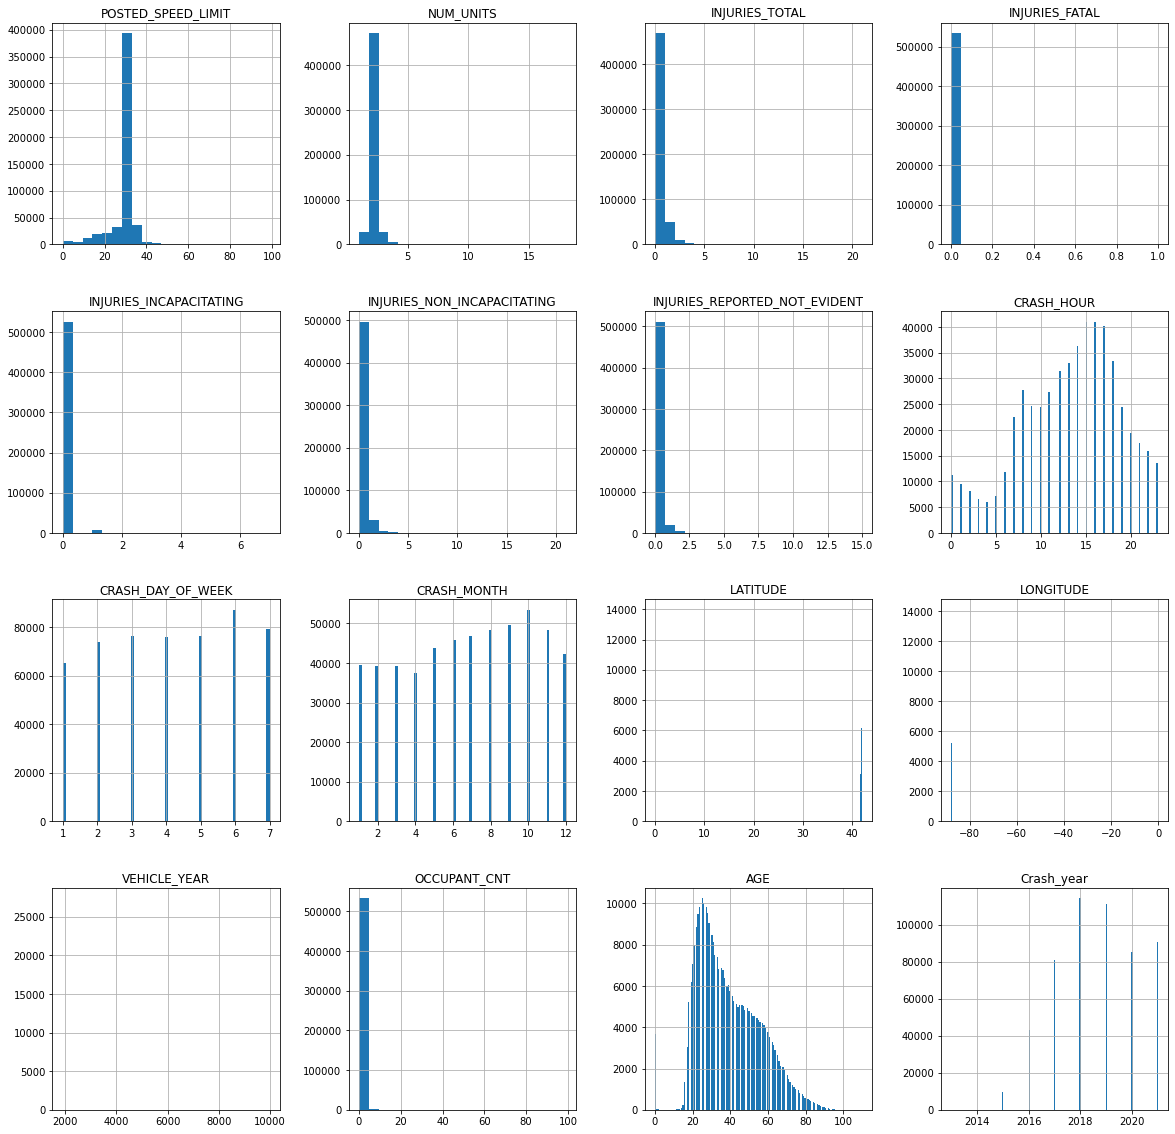

In [52]:
df_driver.hist(figsize=(20,20), bins='auto');

In [49]:
df_driver.INJURIES_FATAL.value_counts()

0.0    533762
1.0       489
Name: INJURIES_FATAL, dtype: int64

# Data Preperation

In [204]:
test_df = df_driver.copy()
test_df = test_df[['AGE', 'CRASH_HOUR', 'POSTED_SPEED_LIMIT', 'INJURIES_FATAL']]
# make columns equal legnth 
test_df = test_df[test_df['AGE'].notna()]

In [156]:
data = test_df[['AGE', 'CRASH_HOUR', 'POSTED_SPEED_LIMIT']].astype('int16')
target = test_df.INJURIES_FATAL.values.astype('int16')

# train-test split

In [166]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.5, random_state=42)

# Decision Tree

In [167]:
tree = DecisionTreeClassifier()

In [168]:
tree_grid = {'max_leaf_nodes': list(range(2, 100)), 
             'min_samples_split': [2, 3, 4],
             'max_depth': [5, 6, 7, 8, 9],
            }


In [169]:
tree_grid_search = GridSearchCV(tree, tree_grid, cv=5)

In [170]:
tree_grid_search.fit(data_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [171]:
tree_grid_search.best_params_

{'max_depth': 5, 'max_leaf_nodes': 2, 'min_samples_split': 2}

In [172]:
tree_grid_search.best_score_

0.9987706556394803

In [185]:
tree_grid_search.best_estimator_.score(data_test, target_test)

0.9988018571214617

In [192]:
tree_cv_df = pd.DataFrame(tree_grid_search.cv_results_)
tree_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024129,0.004554,0.002280,0.000349,5,2,2,"{'max_depth': 5, 'max_leaf_nodes': 2, 'min_sam...",0.998783,0.998752,0.998752,0.998783,0.998783,0.998771,0.000015,1
1,0.020428,0.000484,0.001953,0.000030,5,2,3,"{'max_depth': 5, 'max_leaf_nodes': 2, 'min_sam...",0.998783,0.998752,0.998752,0.998783,0.998783,0.998771,0.000015,1
2,0.020706,0.000592,0.002041,0.000090,5,2,4,"{'max_depth': 5, 'max_leaf_nodes': 2, 'min_sam...",0.998783,0.998752,0.998752,0.998783,0.998783,0.998771,0.000015,1
3,0.025677,0.002415,0.002011,0.000043,5,3,2,"{'max_depth': 5, 'max_leaf_nodes': 3, 'min_sam...",0.998783,0.998752,0.998752,0.998783,0.998783,0.998771,0.000015,1
4,0.025841,0.002666,0.002074,0.000101,5,3,3,"{'max_depth': 5, 'max_leaf_nodes': 3, 'min_sam...",0.998783,0.998752,0.998752,0.998783,0.998783,0.998771,0.000015,1


In [199]:
best_tree = tree_grid_search.best_estimator_

In [196]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

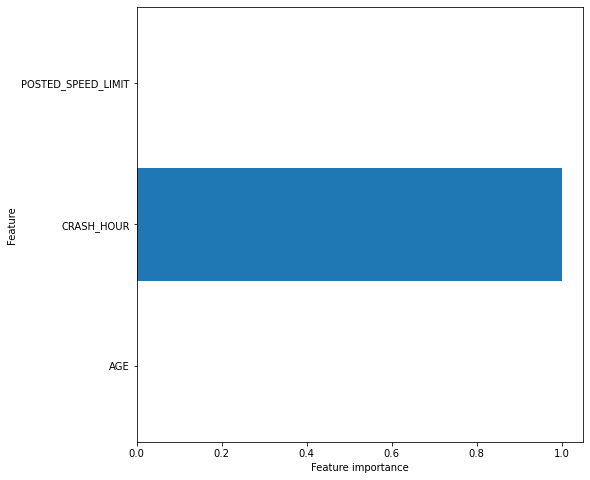

In [200]:
plot_feature_importances(best_tree)

# Random Forest

In [173]:
forest = RandomForestClassifier()

In [177]:
# Number of trees in random forest
# n_estimators = [100,150,200]

# The number of features to consider when looking for the best split
max_features = ['sqrt', 'log2']

# function to measure the quality of a split
criteria = ['gini', 'entropy']

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
forrest_grid = {'max_features': max_features, 
                'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

{'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [178]:
forrest_grid_search = GridSearchCV(estimator=forest, param_grid=forrest_grid, cv=5)

In [179]:
forrest_grid_search.fit(data_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [180]:
forrest_grid_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}

In [181]:
forrest_grid_search.best_score_

0.9987706556394803

In [183]:
forrest_grid_search.best_estimator_.score(data_test, target_test)

0.9988018571214617

In [191]:
forest_cv_df = pd.DataFrame(forrest_grid_search.cv_results_)
forest_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.608719,0.031437,0.229667,0.002871,sqrt,1,2,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.998752,0.998690,0.998752,0.998690,0.998565,0.998690,0.000068,17
1,2.612641,0.023280,0.229373,0.004059,sqrt,1,5,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.998783,0.998752,0.998752,0.998721,0.998752,0.998752,0.000020,15
2,2.598985,0.025440,0.229484,0.002873,sqrt,1,10,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.998783,0.998752,0.998752,0.998783,0.998783,0.998771,0.000015,1
3,2.535748,0.020700,0.221306,0.002901,sqrt,2,2,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.998783,0.998752,0.998752,0.998783,0.998783,0.998771,0.000015,1
4,2.553644,0.019702,0.221371,0.003696,sqrt,2,5,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.998783,0.998752,0.998752,0.998783,0.998783,0.998771,0.000015,1


In [202]:
best_forest = forrest_grid_search.best_estimator_

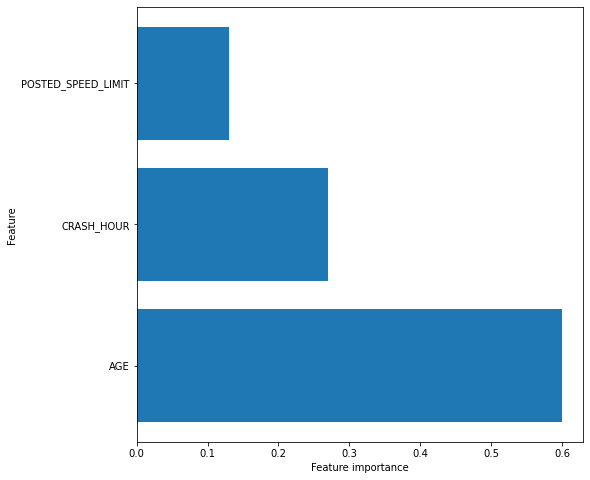

In [203]:
plot_feature_importances(best_forest)

# map

In [35]:
import folium 

In [40]:
map_df = df_driver[:100]

In [117]:
map_center = [map_df.LATITUDE.mean(), map_df.LONGITUDE.mean()]

crash_map = folium.Map(location=map_center, zoom_start=10, control_scale=True)

for index, location_info in map_df.iterrows():
    folium.Marker([location_info["LATITUDE"], location_info["LONGITUDE"]], popup=location_info["INJURIES_FATAL"]).add_to(crash_map)

In [118]:
crash_map